#FLOWER RECOGNITION

 Identifying Flower species using Deep learning and PyTorch

installing opendataset

In [1]:
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import sklearn
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot

In [2]:
!pip install opendatasets --upgrade --quiet

importing opendataset

In [3]:
import opendatasets as od

picking the datasetdataset

In [4]:
dataset_url = 'https://www.kaggle.com/datasets/alxmamaev/flowers-recognition'

cleaning the data directory

In [5]:
import os
import shutil

if os.path.exists('./flowers-recognition'):
    shutil.rmtree('./flowers-recognition')

download dataset

In [6]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ipsita6roy
Your Kaggle Key: ··········


100%|██████████| 225M/225M [00:11<00:00, 20.8MB/s]


initiallizing the dataset

In [7]:
data_dir = './flowers-recognition/flowers'

importing os

In [8]:
import os

In [9]:
os.listdir(data_dir)

['sunflower', 'daisy', 'dandelion', 'rose', 'tulip']

In [10]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

Importing dataset into pytorch


In [11]:
from torchvision.datasets import ImageFolder

In [12]:
dataset = ImageFolder(data_dir)

length of dataset

In [13]:
len(dataset)

4317

checking a dataset element

In [14]:
dataset[10]

(<PIL.Image.Image image mode=RGB size=240x240>, 0)

classes in the dataset

In [15]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

no of images in each class

In [16]:
for cls in os.listdir(data_dir):
  print(cls, ':',len(os.listdir(data_dir + '/' +cls )))

sunflower : 733
daisy : 764
dandelion : 1052
rose : 784
tulip : 984


redefining dataset

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

viewing the image

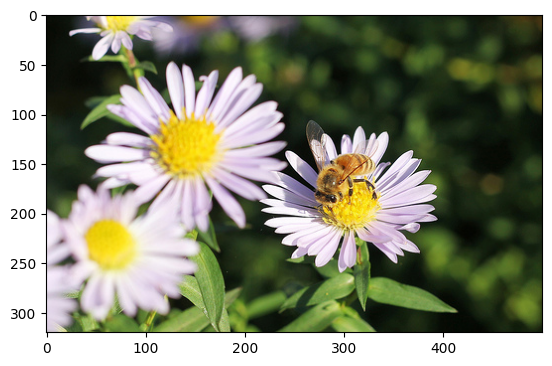

In [18]:
img, label =dataset[15]
plt.imshow(img)

viewing image as pytorch tensor

resizing the whole dataset into same size

In [19]:
import torchvision.transforms as tt

dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(64),
                                            tt.RandomCrop(64),
                                            tt.ToTensor()]))

viewing image as image tensor

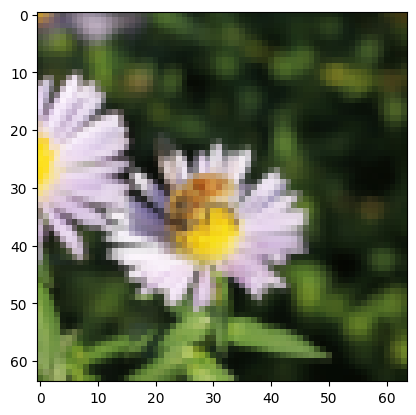

In [20]:
img, label = dataset[15]
plt.imshow(img.permute((1,2,0)))

creating validation training set

In [21]:
val_pct = 0.1
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size

train_size, val_size

(3886, 431)

random split

In [22]:
from torch.utils.data import random_split

train_ds, valid_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(valid_ds)

(3886, 431)

creating dataloader

In [23]:
from torch.utils.data import DataLoader

batch_size = 128

train_dl = DataLoader(train_ds,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory=True)

valid_dl = DataLoader(valid_ds,
                    batch_size,
                    num_workers=4,
                    pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



In [24]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

showing the batch of data

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



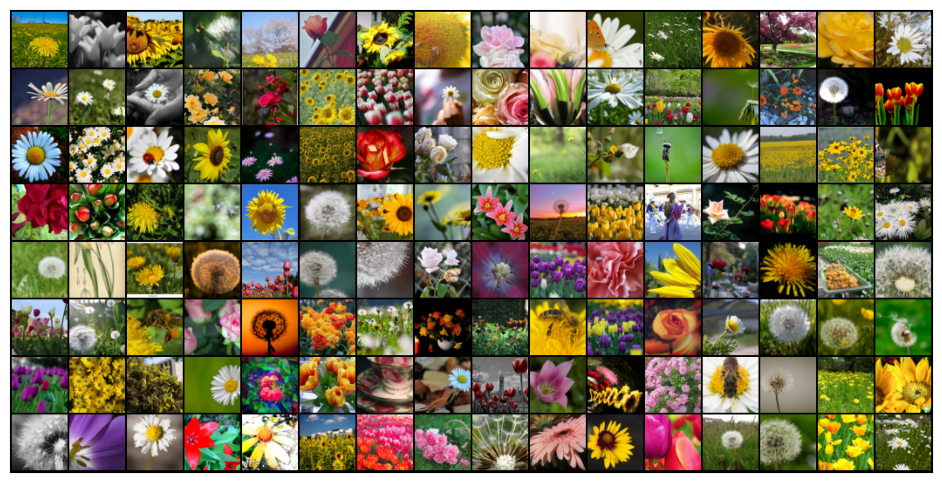

In [25]:
show_batch(train_dl)

GPU utilities

In [26]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [27]:
torch.cuda.is_available()

True

In [28]:
device = get_default_device()

checking the device

In [29]:
device

device(type='cuda')

In [30]:
img, label = dataset[0]

checking image device

In [31]:
img.device

device(type='cpu')

In [32]:
img_gpu = to_device(img, device)
img_gpu.device

device(type='cuda', index=0)

training dataloaders

In [33]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

Model and Training utilities

image classification base

In [34]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

validation step

In [35]:
@torch.no_grad()
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Modelling

resnet9 architecture

In [36]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)
#resnet9 model
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 128 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), # 128 x 128 x 32 x 32
                                  conv_block(128, 128)) # 128 x 128 x 32 x 32

        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8
        self.res2 = nn.Sequential(conv_block(512, 512), # 128 x 512 x 8 x 8
                                  conv_block(512, 512)) # 128 x 512 x 8 x 8

        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [37]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [38]:
model.conv1[0].weight.device

device(type='cuda', index=0)

pass one batch of input tensor through the model

In [39]:
torch.cuda.empty_cache()
for batch in train_dl:
    images, labels = batch
    print('images.shape', images.shape)
    print('images.device', images.device)
    preds = model(images)
    print('preds.shape', preds.shape)
    break

images.shape torch.Size([128, 3, 64, 64])
images.device cuda:0
preds.shape torch.Size([128, 5])


Training

In [40]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 1.6113204956054688, 'val_acc': 0.18297040462493896}]

training the model

In [41]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 1.4681, val_loss: 1.5359, val_acc: 0.3759
Epoch [1], train_loss: 0.9652, val_loss: 0.7749, val_acc: 0.7206
Epoch [2], train_loss: 0.8882, val_loss: 0.8588, val_acc: 0.6730
Epoch [3], train_loss: 0.7628, val_loss: 0.7537, val_acc: 0.7325
Epoch [4], train_loss: 0.7414, val_loss: 0.7774, val_acc: 0.7013


In [42]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.8519, val_loss: 0.8624, val_acc: 0.6679
Epoch [1], train_loss: 0.6720, val_loss: 0.6115, val_acc: 0.7554
Epoch [2], train_loss: 0.5969, val_loss: 0.5124, val_acc: 0.8012
Epoch [3], train_loss: 0.5628, val_loss: 0.5519, val_acc: 0.8031
Epoch [4], train_loss: 0.5334, val_loss: 0.5423, val_acc: 0.8110


In [43]:
history += fit(5, 0.0001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.3931, val_loss: 0.3913, val_acc: 0.8456
Epoch [1], train_loss: 0.3603, val_loss: 0.4382, val_acc: 0.8383
Epoch [2], train_loss: 0.3423, val_loss: 0.3827, val_acc: 0.8543
Epoch [3], train_loss: 0.3237, val_loss: 0.3940, val_acc: 0.8509
Epoch [4], train_loss: 0.3096, val_loss: 0.3711, val_acc: 0.8699


training till 80 accuracy

In [44]:
history += fit(5, 0.0001, model, train_dl, valid_dl)

Epoch [0], train_loss: 0.2904, val_loss: 0.3596, val_acc: 0.8669
Epoch [1], train_loss: 0.2837, val_loss: 0.3708, val_acc: 0.8733
Epoch [2], train_loss: 0.2874, val_loss: 0.3638, val_acc: 0.8640
Epoch [3], train_loss: 0.2864, val_loss: 0.3994, val_acc: 0.8529
Epoch [4], train_loss: 0.2937, val_loss: 0.3744, val_acc: 0.8495


Evaluating the Model Performance

plotting accuracy

In [45]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

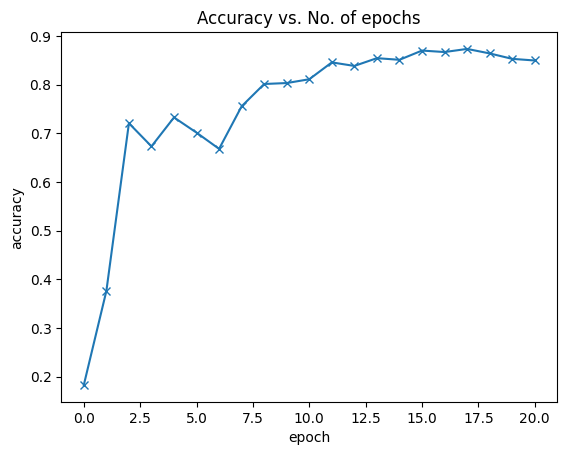

In [46]:
plot_accuracies(history)

plot losses

In [47]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

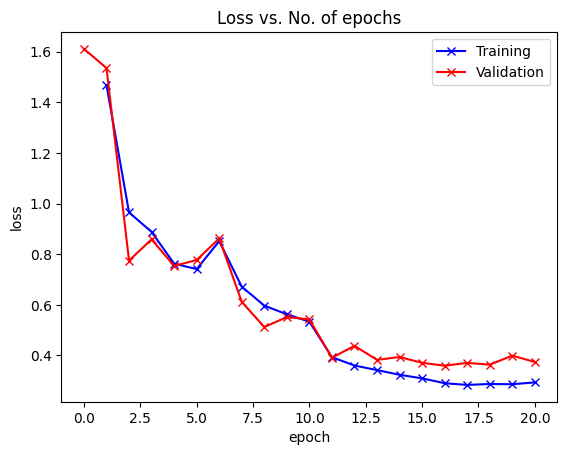

In [48]:
plot_losses(history)

Record the results

In [49]:
history[-1]

{'val_loss': 0.3743736743927002,
 'val_acc': 0.8494846820831299,
 'train_loss': 0.29367828369140625}

Test with individual images

predicting image

In [50]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

displaying the image

'rose'

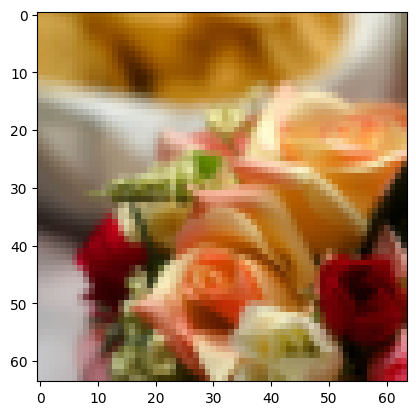

In [51]:
img,label =valid_ds[0]
plt.imshow(img.permute((1,2,0)))
predict_image(img,model,dataset.classes)

showing image prediction

In [52]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, dataset.classes)
    print('Target:', dataset.classes[label])
    print('Prediction:', pred)

trying different predictions from the dataset

Target: tulip
Prediction: tulip


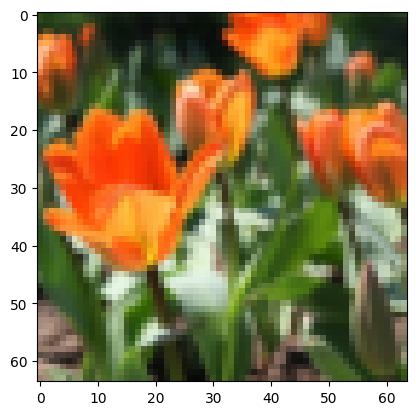

In [53]:
show_image_prediction(*valid_ds[100])

Target: sunflower
Prediction: sunflower


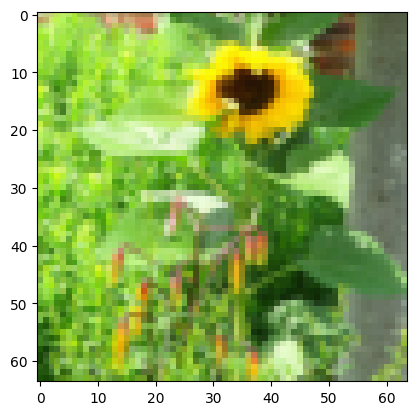

In [54]:
show_image_prediction(*valid_ds[300])

Target: dandelion
Prediction: sunflower


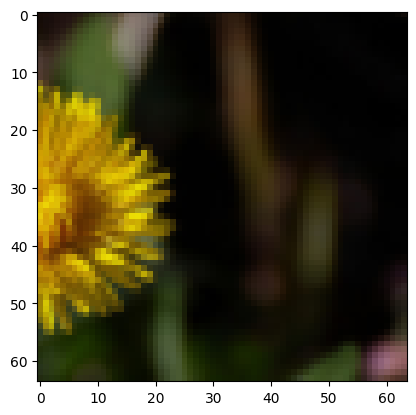

In [55]:
show_image_prediction(*valid_ds[12])

saving the model

In [56]:
torch.save(model.state_dict(), 'flowers-resnet9.pth')